<a href="https://colab.research.google.com/github/PTIch06/YasynskyiColab/blob/main/Lab5_Yasynskyi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №5
##з дисципліни "Нейронні мережі"
###студента групи КН-31/2
###Ясинського Дениса
###Варіант №11

1. На основі документу вирішити завдання класифікації зображень їжі для 3 класів з набору даних food101
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи.

Варіант: 10, 40, 70


In [21]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile("101_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-05-23 21:21:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G   165MB/s    in 8.4s    

2022-05-23 21:21:16 (185 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [22]:
import pathlib
import numpy as np
import os

#загальна кількість файлів
data_dir_train = pathlib.Path("101_food_classes_10_percent/train/") 
data_dir_test = pathlib.Path("101_food_classes_10_percent/test/")
num_food_images_train = len(os.listdir(data_dir_train))
print('Count of images are in a file:', num_food_images_train)

#фільтруємо згідно до варіанту
arr_index = [10,40,70]
class_names = np.array(sorted([item.name for item in data_dir_train.glob('*')]))
new_class_names = [class_names[arr_index[0]], class_names[arr_index[1]],class_names[arr_index[2]]]
print('Our classes:', new_class_names)

Count of images are in a file: 101
Our classes: ['bruschetta', 'french_fries', 'pad_thai']


In [23]:
from pathlib import Path
import shutil

#Видалимо класи, окрім заданих
for name in class_names:
  if name != new_class_names[0] and name != new_class_names[1] and name != new_class_names[2]:
    dirpath = Path(data_dir_train) / name
    dirpath_test = Path(data_dir_test) / name
    if dirpath_test.exists() and dirpath_test.is_dir():
        shutil.rmtree(dirpath)
        shutil.rmtree(dirpath_test)
print('Test:', os.listdir(data_dir_test))
print('Train:', os.listdir(data_dir_train))

Test: ['pad_thai', 'bruschetta', 'french_fries']
Train: ['pad_thai', 'bruschetta', 'french_fries']


In [25]:
#Знормуємо, та перетворимо файли у дані

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [29]:
#Навчання
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
  Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(32, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])

model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_model = model.fit(train_data_augmented,
                          epochs=30,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/30
24/24 [==============================] - 51s 2s/step - loss: 1.3828 - accuracy: 0.3747 - val_loss: 1.0486 - val_accuracy: 0.4622
Epoch 2/30
24/24 [==============================] - 73s 3s/step - loss: 1.0185 - accuracy: 0.4960 - val_loss: 1.0088 - val_accuracy: 0.5111
Epoch 3/30
24/24 [==============================] - 50s 2s/step - loss: 0.9552 - accuracy: 0.5587 - val_loss: 0.9395 - val_accuracy: 0.5733
Epoch 4/30
24/24 [==============================] - 50s 2s/step - loss: 0.8722 - accuracy: 0.6173 - val_loss: 0.9000 - val_accuracy: 0.5600
Epoch 5/30
24/24 [==============================] - 50s 2s/step - loss: 0.8595 - accuracy: 0.6120 - val_loss: 1.2140 - val_accuracy: 0.4844
Epoch 6/30
24/24 [==============================] - 51s 2s/step - loss: 0.8518 - accuracy: 0.6240 - val_loss: 0.8212 - val_accuracy: 0.6356
Epoch 7/30
24/24 [==============================] - 50s 2s/step - loss: 0.8041 - accuracy: 0.6560 - val_loss: 0.8405 - val_accuracy: 0.6222
Epoch 8/30
24/24 [==

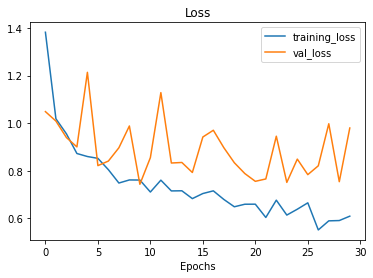

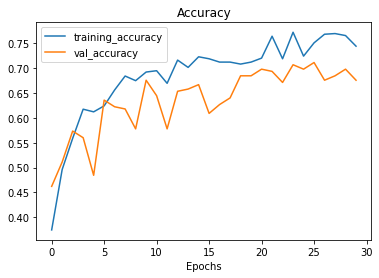

In [30]:
#Побудуємо криві
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Втрати
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Точність
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();
  
plot_loss_curves(history_model)